# <center> Walmart sales EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('./walmart-sales-dataset-of-45stores.csv',parse_dates=['Date'])

###  Droping null values and duplicates

In [3]:
data.dropna(inplace=True)
data.isnull().mean()*100
data.drop_duplicates(inplace=True)

### Importing new columns

In [4]:
data['year']=data.Date.dt.year
data['month']=data.Date.dt.month
data['week_day']=data.Date.dt.day_of_week

In [5]:
data['weekday']=data.week_day.replace({0:'sunday',1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'})

In [6]:
data['Holiday_Flag_Name'] = data.Holiday_Flag.replace({0:'Working day',1:'Holiday'})
data['month'].replace({1:'january',2:'february',3:'march',4:'april',5:'may',6:'june',7:'july',8:'augest',9:'september',10:'october',11:'november',12:'december'},inplace=True)


In [7]:
data.sort_values(by='Date',inplace=True)

In [8]:
data.reset_index(drop=True,inplace=True)

In [9]:
data['temp_celcius']=[(Temperature-32)*(5/9) for Temperature in data.Temperature]

In [10]:
data['weather']=pd.cut(x=data.temp_celcius,bins=[-20,10,35],labels=['cold','hot'])

### droping of unwanted columns

In [11]:
data.drop(columns=['week_day'],inplace=True)
data.drop(columns=['Temperature'],inplace=True)

In [12]:

data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment,year,month,weekday,Holiday_Flag_Name,temp_celcius,weather
0,5,2010-01-10,283178.12,0,2.603,212.226946,6.768,2010,january,saturday,Working day,21.722222,hot
1,15,2010-01-10,566945.95,0,2.840,132.756800,8.067,2010,january,saturday,Working day,15.383333,hot
2,42,2010-01-10,481523.93,0,3.001,126.234600,9.003,2010,january,saturday,Working day,30.005556,hot
3,33,2010-01-10,224294.39,0,3.001,126.234600,9.265,2010,january,saturday,Working day,33.027778,hot
4,36,2010-01-10,422169.47,0,2.567,210.440443,8.476,2010,january,saturday,Working day,23.700000,hot
5,40,2010-01-10,891152.33,0,2.717,132.756800,5.287,2010,january,saturday,Working day,16.672222,hot
6,43,2010-01-10,657108.77,0,2.603,203.593429,10.210,2010,january,saturday,Working day,25.516667,hot
7,1,2010-01-10,1453329.50,0,2.603,211.671989,7.838,2010,january,saturday,Working day,22.161111,hot
8,28,2010-01-10,1203080.41,0,3.001,126.234600,14.313,2010,january,saturday,Working day,29.555556,hot
9,21,2010-01-10,677158.39,0,2.603,211.329874,8.163,2010,january,saturday,Working day,21.266667,hot


In [13]:
monthly_sale=pd.pivot_table(data=data,values='Weekly_Sales',index='month',columns='year')
monthly_sale

year,2010,2011,2012
month,,,
april,1.021177e+06,1.033220e+06,1.014127e+06
augest,1.025212e+06,1.044895e+06,1.064514e+06
december,1.198413e+06,1.274311e+06,1.025078e+06
february,1.064372e+06,1.042273e+06,1.057997e+06
january,9.386639e+05,9.420697e+05,9.567817e+05
july,1.023702e+06,9.976049e+05,1.025480e+06
june,1.055082e+06,1.038471e+06,1.082920e+06
march,1.034590e+06,1.011263e+06,1.025510e+06
may,1.039303e+06,1.015565e+06,1.053948e+06


# Univariate analysis


#### 1.Histogram

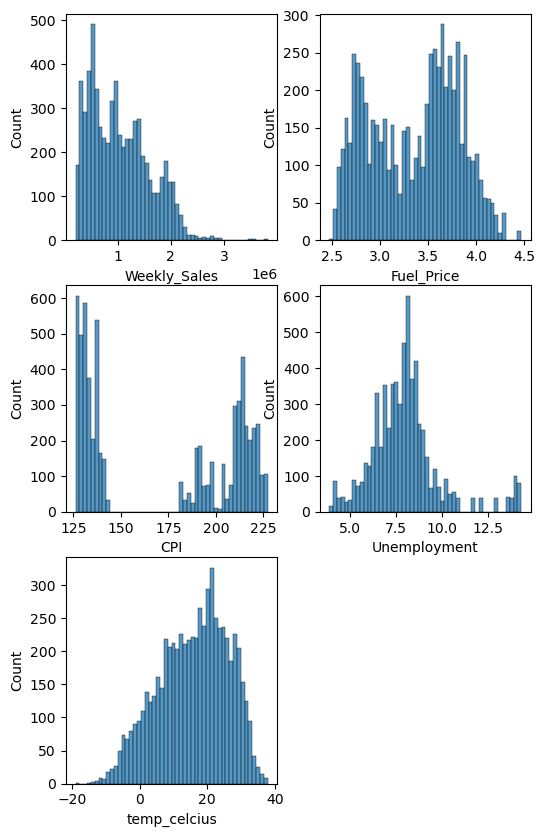

In [14]:
plt.figure(figsize=(6,10))
plt.subplot(3,2,1)
sns.histplot(data=data,x='Weekly_Sales',bins=50);
plt.subplot(3,2,2)
sns.histplot(data=data,x='Fuel_Price',bins=50)
plt.subplot(3,2,3)
sns.histplot(data=data,x='CPI',bins=50);
plt.subplot(3,2,4)
sns.histplot(data=data,x='Unemployment',bins=50);
plt.subplot(3,2,5)
sns.histplot(data=data,x='temp_celcius',bins=50);

#### 2.combined plot

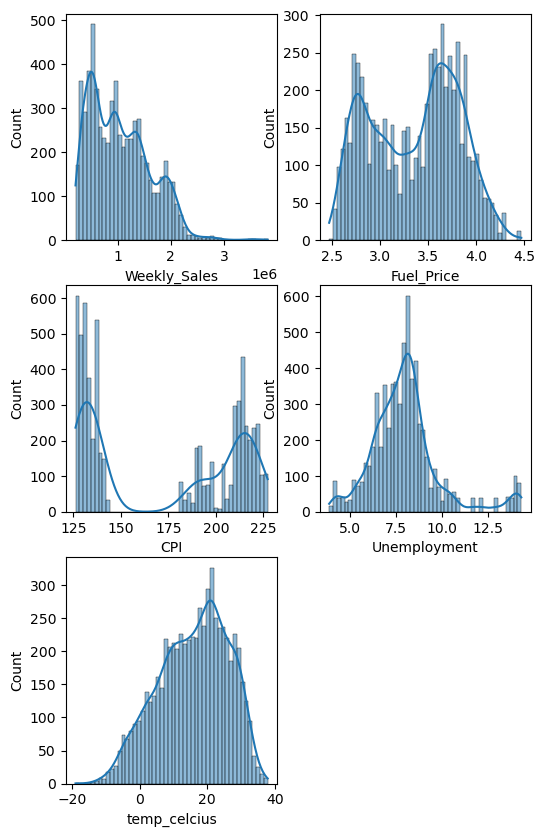

In [15]:
plt.figure(figsize=(6,10))
plt.subplot(3,2,1)
sns.histplot(data=data,x='Weekly_Sales',kde=True,bins=50)
plt.subplot(3,2,2)
sns.histplot(data=data,x='Fuel_Price',kde=True,bins=50)
plt.subplot(3,2,3)
sns.histplot(data=data,x='CPI',kde=True,bins=50);
plt.subplot(3,2,4)
sns.histplot(data=data,x='Unemployment',kde=True,bins=50);
plt.subplot(3,2,5)
sns.histplot(data=data,x='temp_celcius',kde=True,bins=50);

#### 3.subplots of boxplot

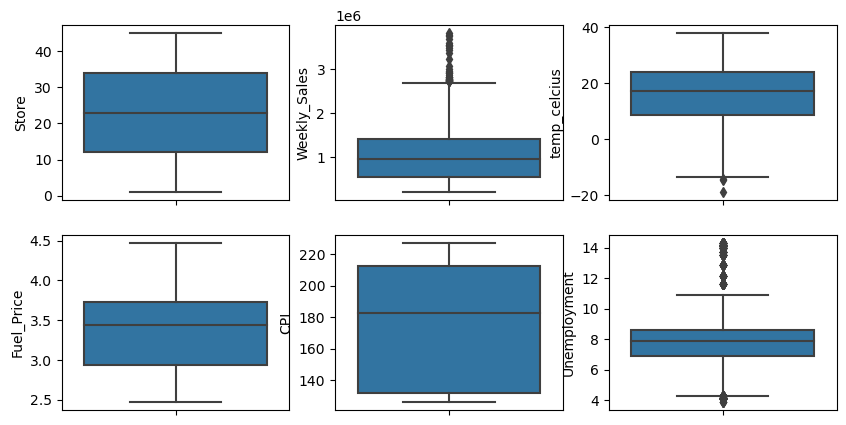

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(2,3,1)
sns.boxplot(data=data,y='Store')
plt.subplot(2,3,2)
sns.boxplot(data=data,y='Weekly_Sales')
plt.subplot(2,3,3)
sns.boxplot(data=data,y='temp_celcius')
plt.subplot(2,3,4)
sns.boxplot(data=data,y='Fuel_Price')
plt.subplot(2,3,5)
sns.boxplot(data=data,y='CPI')
plt.subplot(2,3,6)
sns.boxplot(data=data,y='Unemployment');


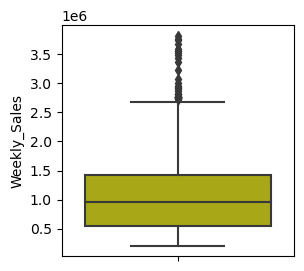

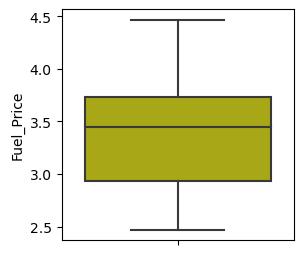

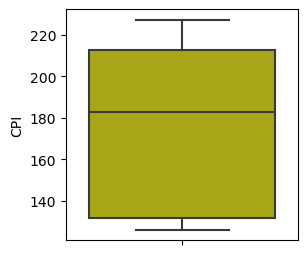

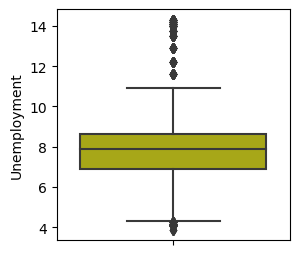

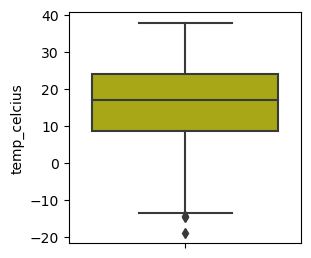

In [17]:
x=['Weekly_Sales','Fuel_Price','CPI','Unemployment','temp_celcius']
for i in x:
    plt.figure(figsize=(3,3))
    sns.boxplot(y=data[i],data=data,color='y')
    plt.show()

#### normalisation needed in un employment and weekly sale .

#### 4.count plot

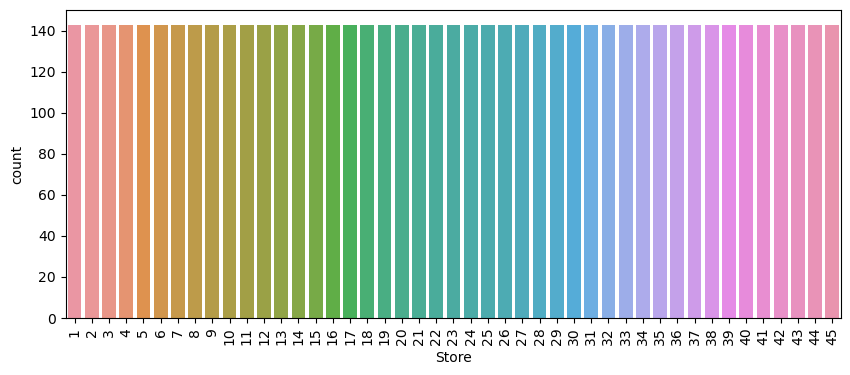

In [18]:
plt.figure(figsize=(10,4))
sns.countplot(data=data,x='Store')
plt.xticks(rotation=90)
plt.show()

#### 5.Is no.of holidays<no. of working days

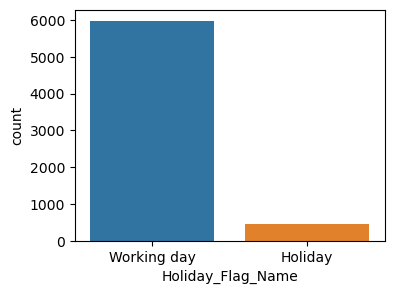

In [19]:
plt.figure(figsize=(4,3))
sns.countplot(data=data,x='Holiday_Flag_Name');

## Multivariate analysis

#### 6.Bar plot

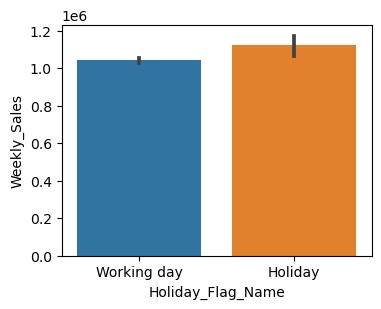

In [20]:
plt.figure(figsize=(4,3))
sns.barplot(data=data,x='Holiday_Flag_Name',y='Weekly_Sales');

#### 7.Heat map 

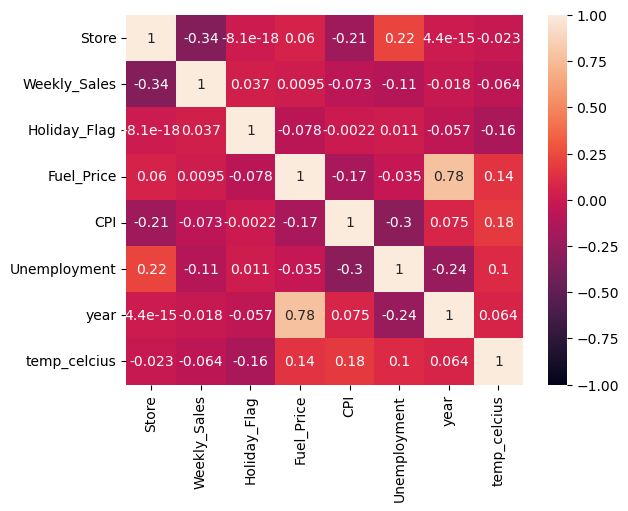

In [21]:

sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1);


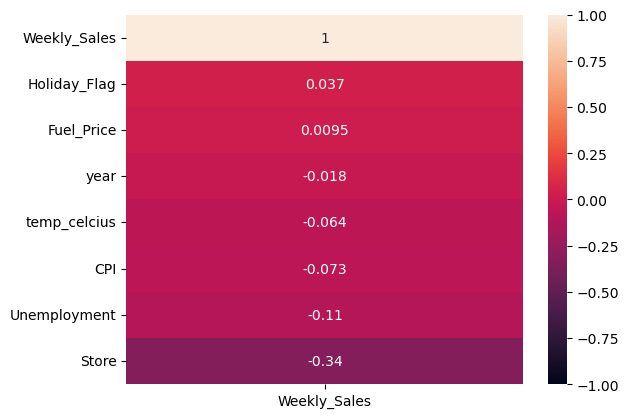

In [22]:
sns.heatmap(data.corr()[['Weekly_Sales']].sort_values(by='Weekly_Sales',ascending=False),vmin=-1,vmax=1,annot=True);






#### 8.Pie chart

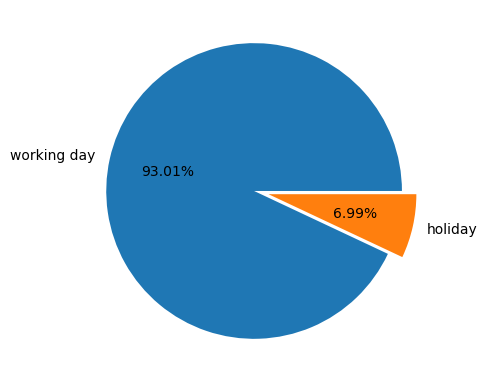

In [23]:
plt.pie(data=data,\
x=data.Holiday_Flag.value_counts(),\
explode=[0.1,0],\
labels=['working day','holiday'],\
autopct='%0.2f%%');


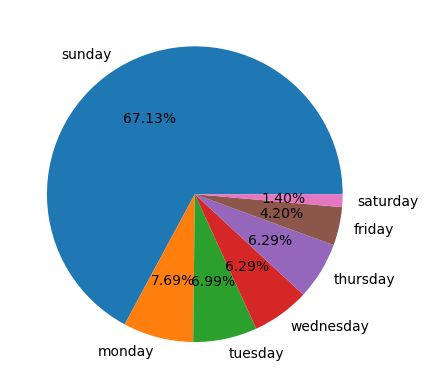

In [24]:
plt.pie(data=data,\
       x=data.weekday.value_counts(),\
       labels=['sunday','monday','tuesday','wednesday','thursday','friday','saturday'],\
       autopct='%0.2f%%');

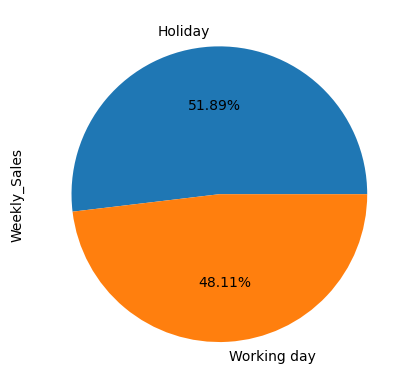

In [25]:
holiday_sales= data.groupby(['Holiday_Flag_Name'])['Weekly_Sales'].mean()
holiday_sales.plot.pie(autopct='%1.2f%%');


#### 9.line chart

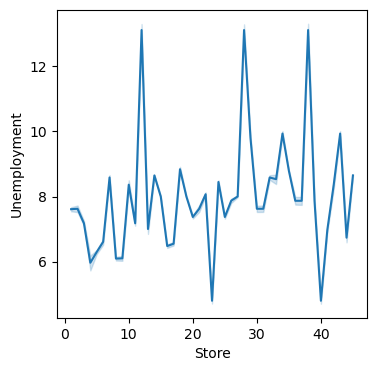

In [26]:
plt.figure(figsize=(4,4))
sns.lineplot(data=data,x='Store',y='Unemployment');

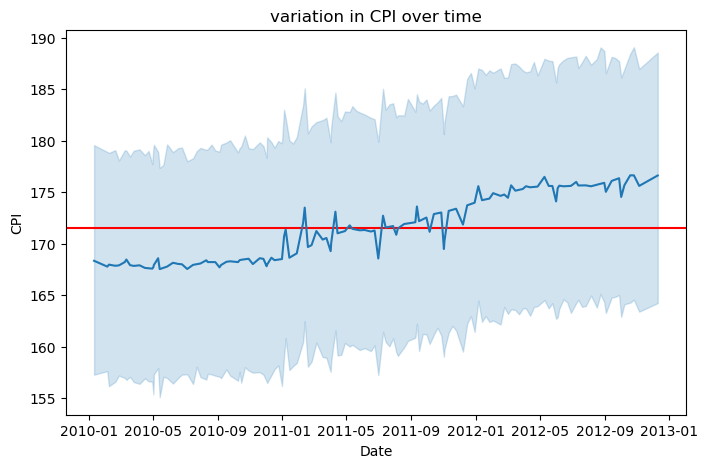

In [27]:
plt.figure(figsize=(8,5))
plt.axhline(y=data.CPI.mean(),color='r')
sns.lineplot(x='Date',y='CPI',data=data)
plt.title('variation in CPI over time');


In [28]:
m=['Weekly_Sales','Fuel_Price','CPI','Unemployment','temp_celcius']

#### subplot

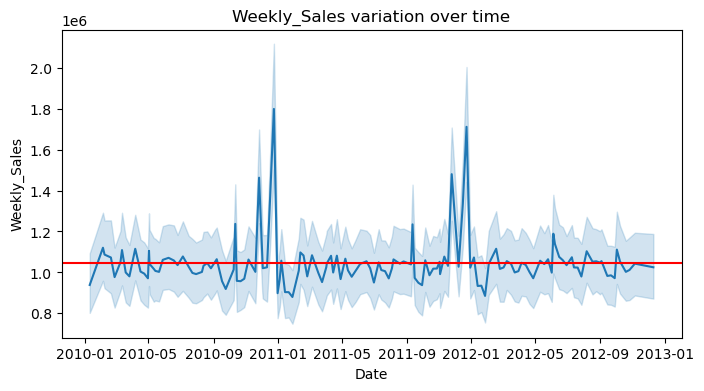

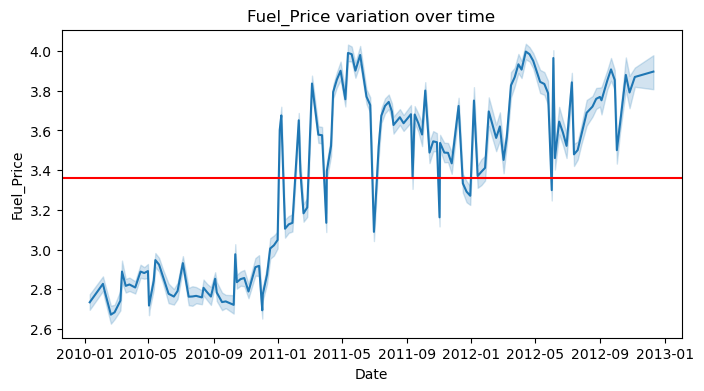

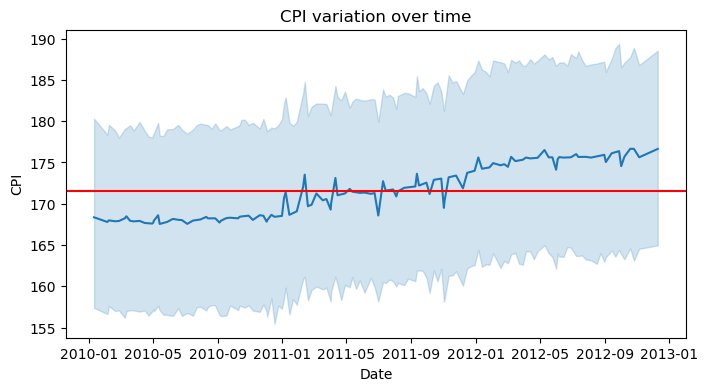

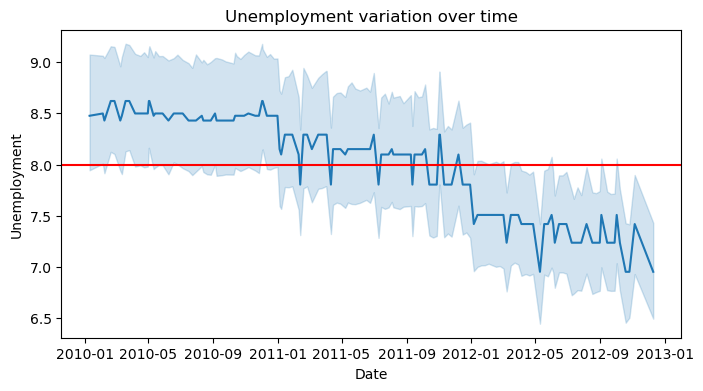

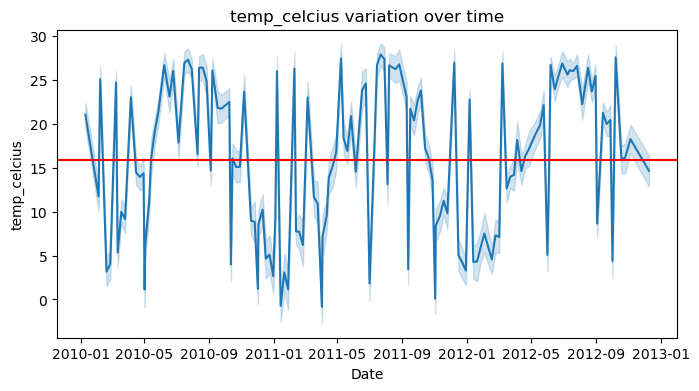

In [29]:
a='variation over time'
for i in x:
    plt.figure(figsize=(8,4))
    sns.lineplot(data=data,x='Date',y=data[i])
    plt.axhline(y=data[i].mean(),color='r')
    plt.title(i+' '+a)
    plt.show()
    
    

#### 10.scatter plot

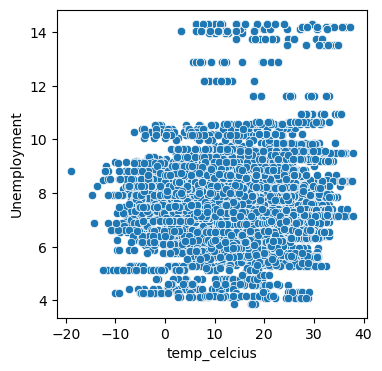

In [30]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=data,x='temp_celcius',y='Unemployment');

#### subplot

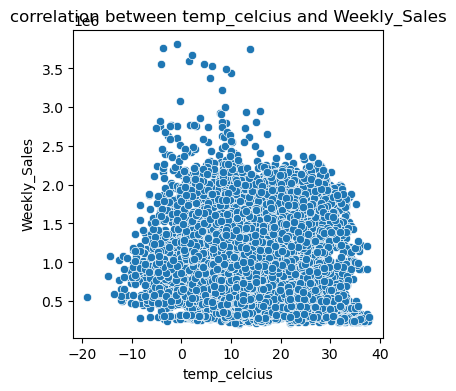

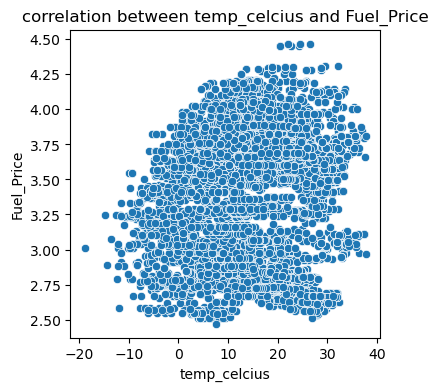

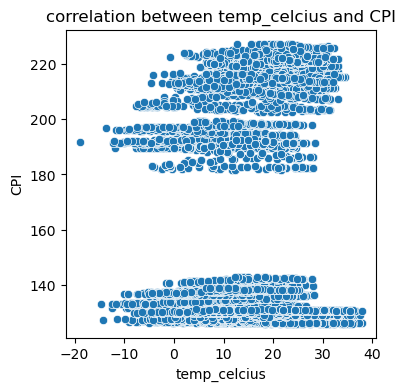

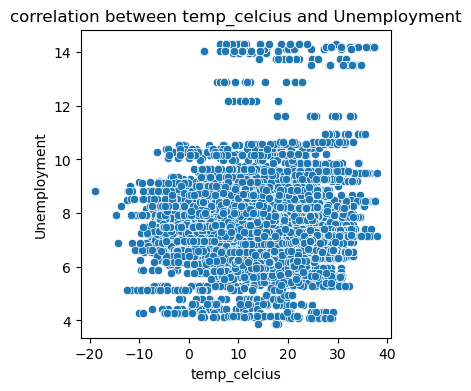

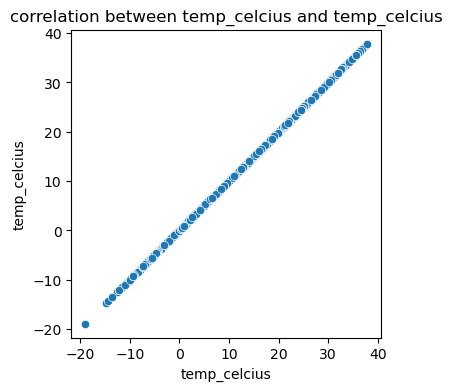

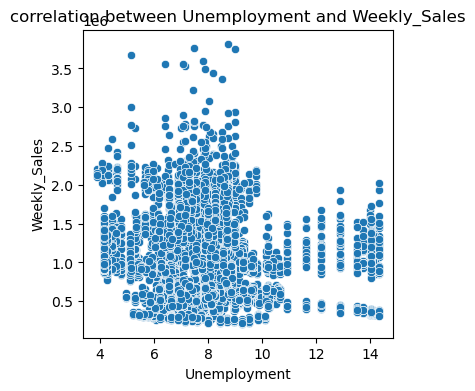

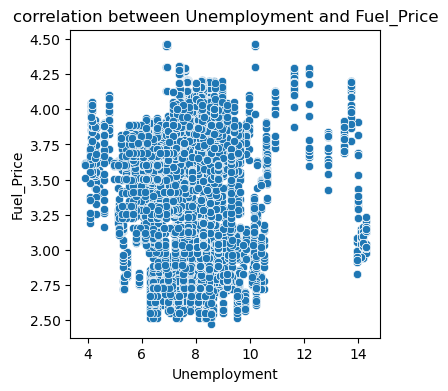

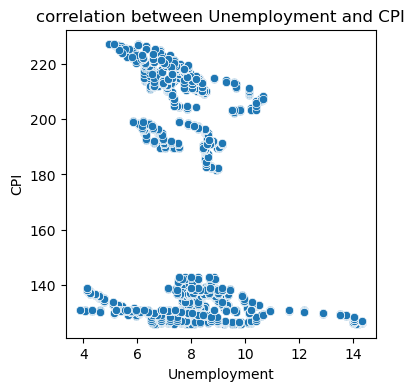

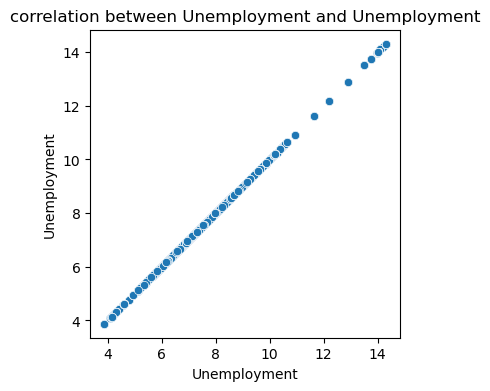

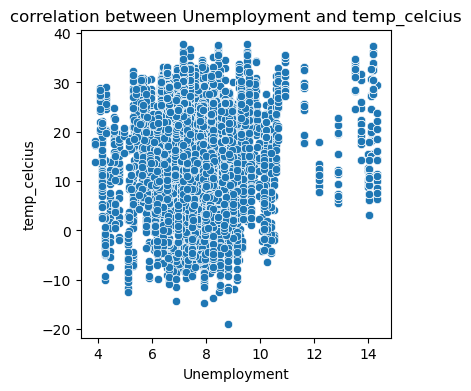

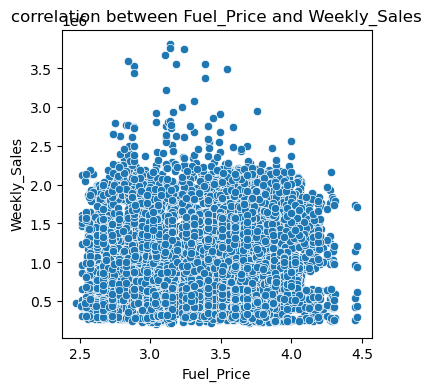

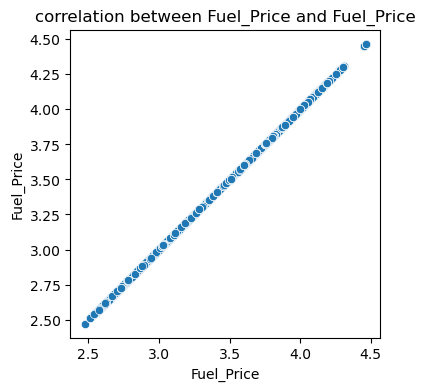

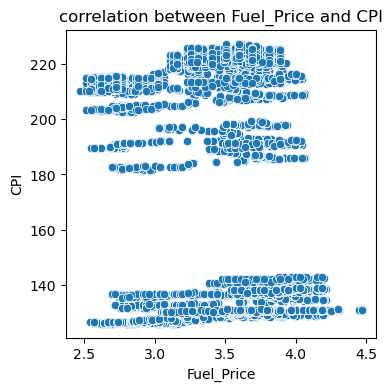

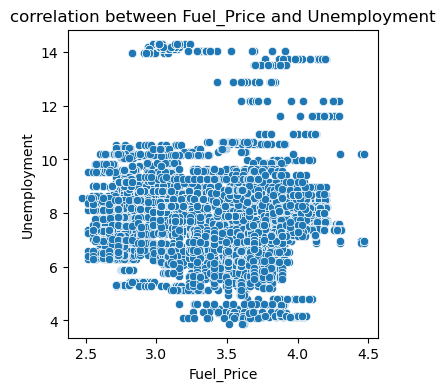

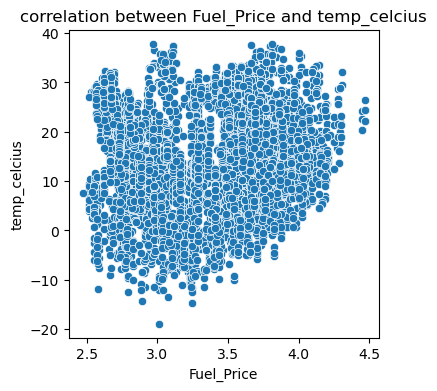

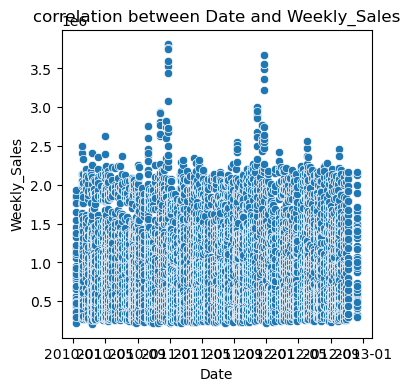

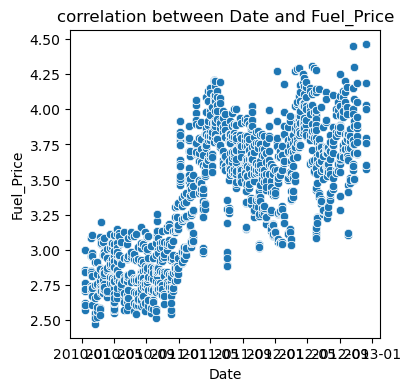

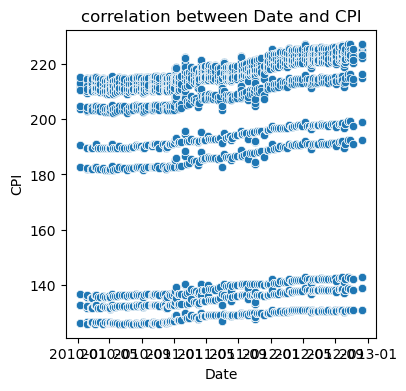

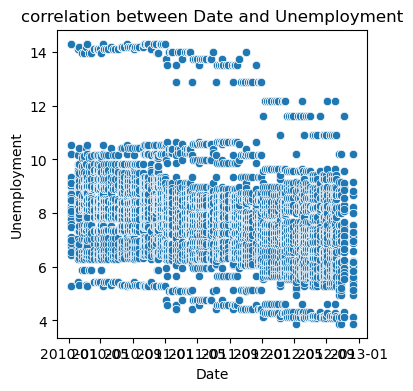

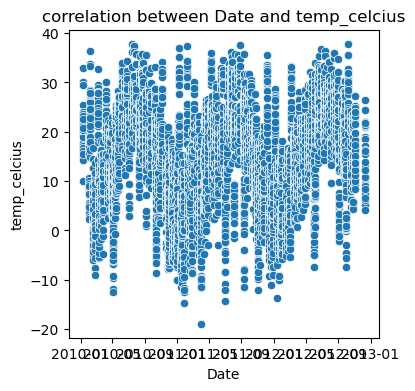

In [31]:
n=['temp_celcius','Unemployment','Fuel_Price','Date']
a='correlation between'
b='and'
for i in n:
    for j in m:
        plt.figure(figsize=(4,4))
        sns.scatterplot(x=data[i],y=data[j],data=data)
        plt.title(a+' '+i+' '+b+' '+j)
        plt.show()

#### 11.regplot

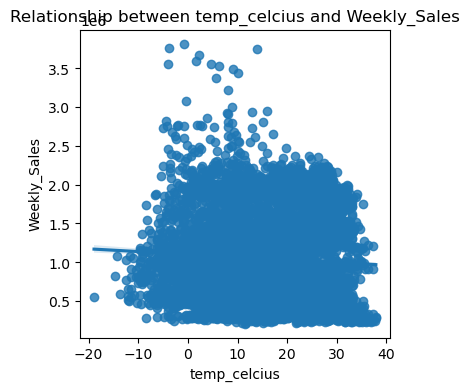

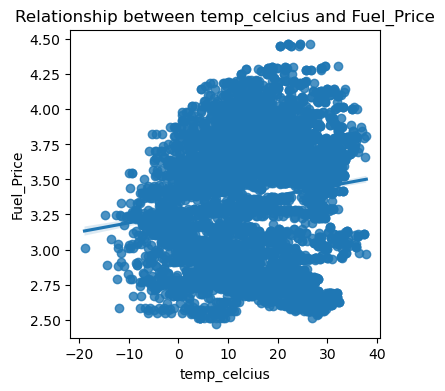

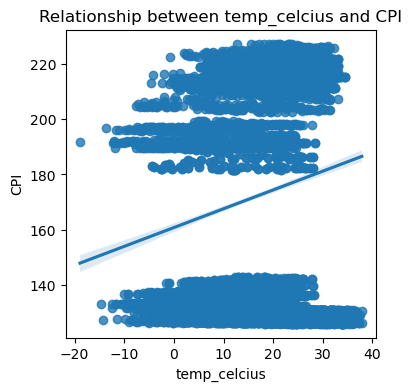

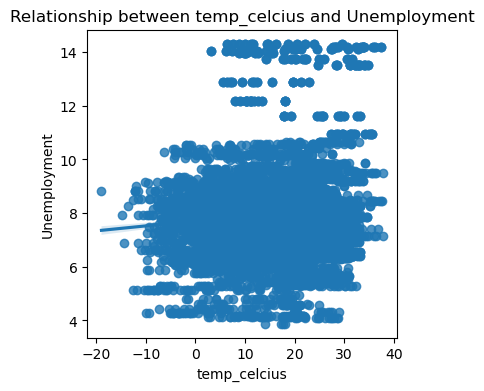

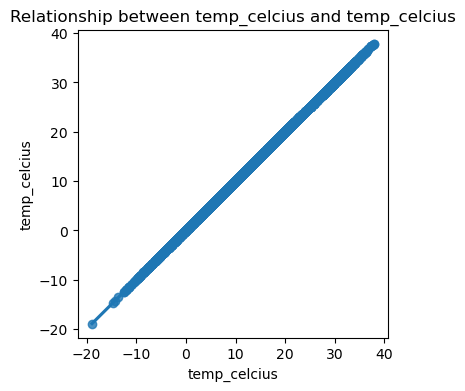

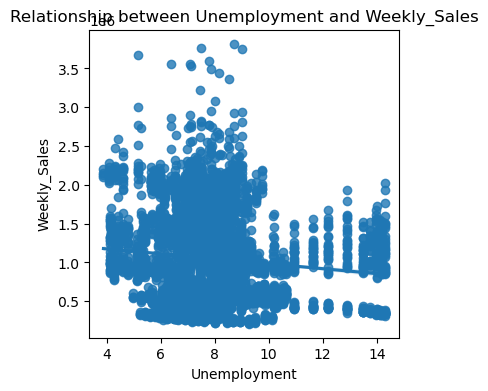

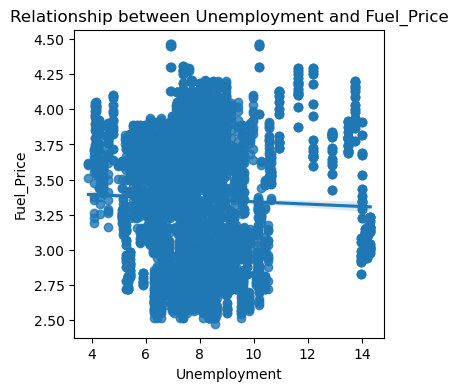

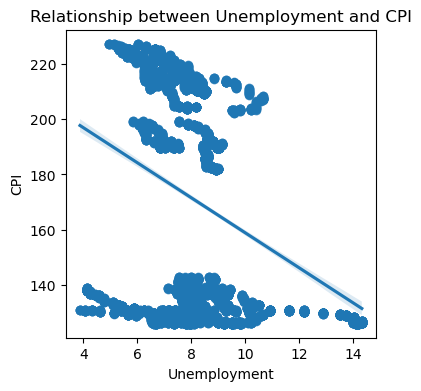

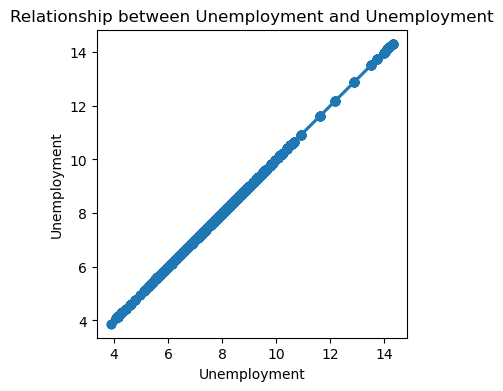

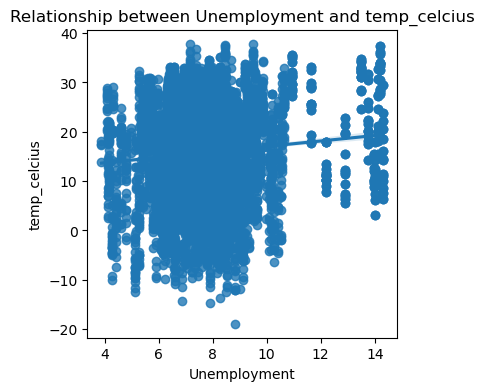

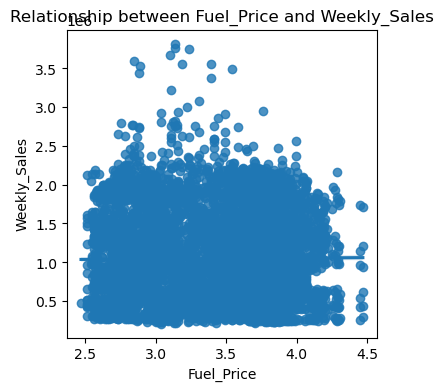

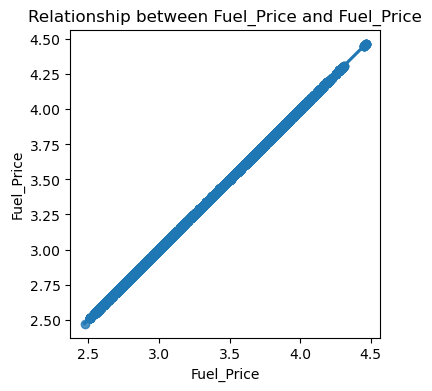

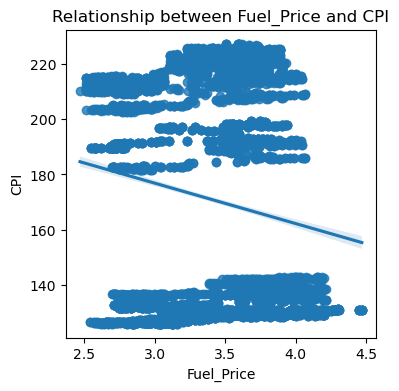

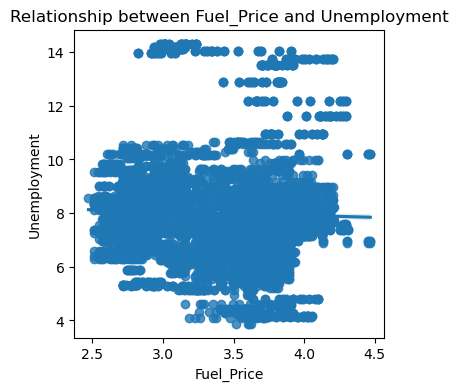

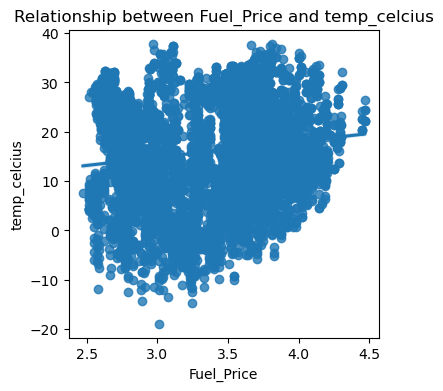

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

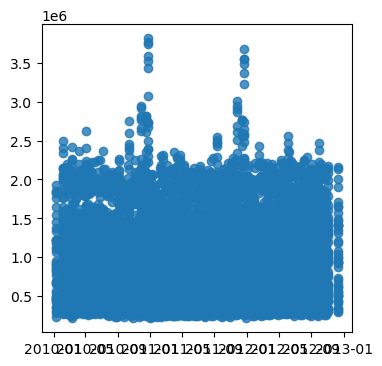

In [32]:
n=['temp_celcius','Unemployment','Fuel_Price','Date']
a='Relationship between'
b='and'
for i in n:
    for j in m:
        plt.figure(figsize=(4,4))
        sns.regplot(x=data[i],y=data[j],data=data)
        plt.title(a+' '+i+' '+b+' '+j)
        plt.show()

#### 12.data set based on years

In [33]:
data_2010=data[data.year==2010]
data_2011=data[data.year==2011]
data_2012=data[data.year==2012]



#### 13.what are the drastic changes occured in unemployment and weekly sales over time?

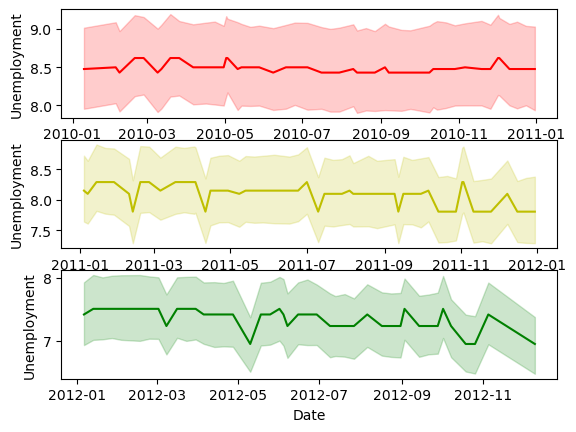

In [34]:
plt.subplot(3,1,1)
sns.lineplot(data=data_2010,x='Date',y='Unemployment',color='r');
plt.subplot(3,1,2)
sns.lineplot(data=data_2011,x='Date',y='Unemployment',color='y');
plt.subplot(3,1,3)
sns.lineplot(data=data_2012,x='Date',y='Unemployment',color='g');

In [35]:
year_unemployment=data.groupby(['year'])['Unemployment'].mean()

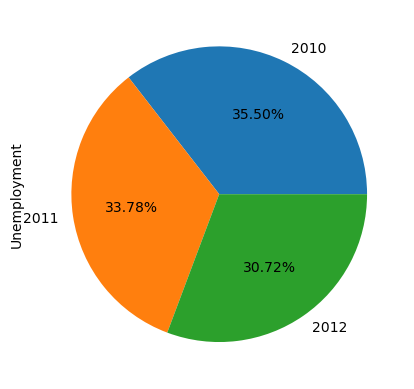

In [36]:
year_unemployment.plot.pie(autopct='%1.2f%%');

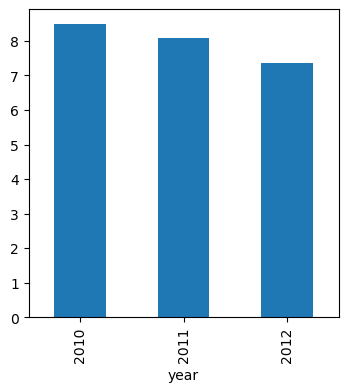

In [37]:
plt.figure(figsize=(4,4))
year_unemployment.plot.bar();

####  14.  2010 was faced highest  unemployment.Unemployment was decrasing by increasing year

In [38]:
year_sales=data.groupby(['year'])['Weekly_Sales'].mean()

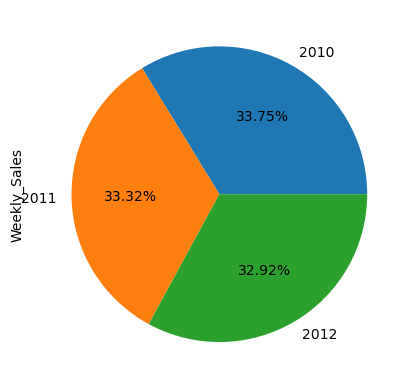

In [39]:
year_sales.plot.pie(autopct='%1.2f%%');

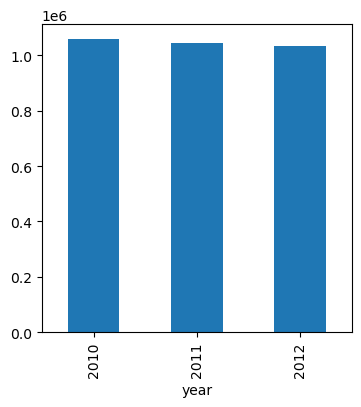

In [40]:
plt.figure(figsize=(4,4))
year_sales.plot.bar();


#### The weekly sales are increasing over time that is why the unemployment is decreasing. 

#### 15.Is there any change in number of holidays in 2012 as compared to the previous years ?


In [41]:
Holiday_year = pd.crosstab(data.Holiday_Flag, data.year)

In [42]:
Holiday_year

year,2010,2011,2012
Holiday_Flag,,,
0,1980,2160,1845
1,180,180,90


In [48]:
Holiday_year = Holiday_year.reset_index()

In [50]:
Holiday_year_g = data.groupby(['year'])['Holiday_Flag'].value_counts()
Holiday_year_g

year  Holiday_Flag
2010  0               1980
      1                180
2011  0               2160
      1                180
2012  0               1845
      1                 90
Name: Holiday_Flag, dtype: int64

<Figure size 400x300 with 0 Axes>

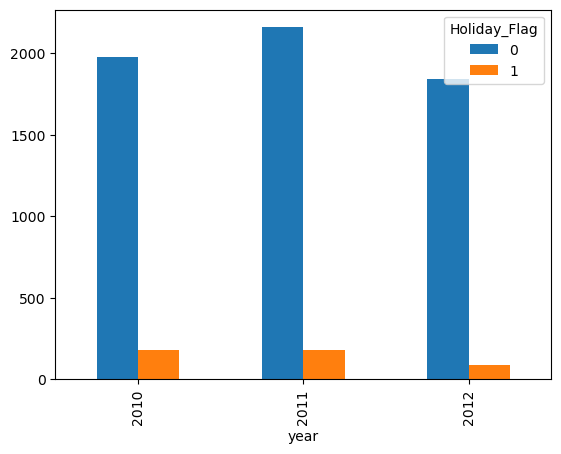

In [45]:
plt.figure(figsize=(4,3))
Holiday_year_g.unstack().plot.bar();

In [46]:
year_holiday=data.groupby(['year'])['Holiday_Flag'].sum()

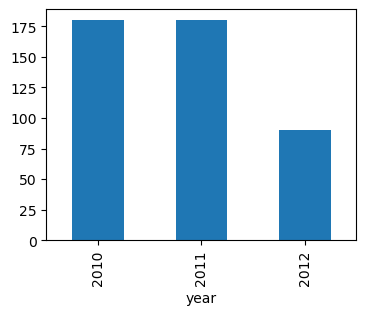

In [47]:
plt.figure(figsize=(4,3))
year_holiday.plot.bar();

#### 2012 has lesser no.of holidays as compared to previous years.Both 2010 and 2011 have equal no.of holidays.

#### 16.which day has the highest sale?

In [ ]:
daily_sale=data.groupby(['weekday'])['Weekly_Sales'].mean()

In [ ]:
daily_sale

In [ ]:
plt.figure(figsize=(4,3))
daily_sale.plot.bar();

In [ ]:
daily_sale.plot.pie(autopct='%1.2f%%');

In [ ]:
plt.figure(figsize=(8,3))
daily_sale.plot();

#### sunday has comparatively large sale than other days

#### 17.which month have highest sale occured? 

In [ ]:
monthly_sale=pd.pivot_table(data=data,values='Weekly_Sales',index='month',columns='year')
monthly_sale

In [ ]:
plt.figure(figsize=(3,3))
monthly_sale.plot();

In [ ]:
month_sale=data.groupby(['month'])['Weekly_Sales'].mean()

In [ ]:
plt.figure(figsize=(4,3))
month_sale.plot.bar();

#### december has highest sale.

In [ ]:
data.head()

#### 18.yearly store from each store

In [ ]:
yearly_sales_stores=data.groupby(['Store','year'])['Weekly_Sales'].mean()

In [ ]:
yearly_sales_stores=yearly_sales_stores.reset_index()

In [ ]:
yearly_sales_stores.nlargest(5,'Weekly_Sales')

In [ ]:
yearly_sales_stores_2010=yearly_sales_stores[yearly_sales_stores.year==2010]
yearly_sales_stores_2011=yearly_sales_stores[yearly_sales_stores.year==2011]
yearly_sales_stores_2012=yearly_sales_stores[yearly_sales_stores.year==2012]

#### 19.yearly sales of stores in the year 2010 

In [ ]:
plt.figure(figsize=(4,3))
yearly_sales_stores_2010.Weekly_Sales.nlargest(5).plot.bar(color='y');

#### 20.yearly sales of stores in the year 2011


In [ ]:
plt.figure(figsize=(4,3))
yearly_sales_stores_2011.Weekly_Sales.nlargest(5).plot.bar(color='r');

#### 21.yearly sales of stores in the year 2012

In [ ]:
plt.figure(figsize=(4,3))
yearly_sales_stores_2012.Weekly_Sales.nlargest(5).plot.bar(color='g');

#### 22.year wise comparison of CPI


In [ ]:
year_CPI=data.groupby(['year'])['CPI'].mean()
plt.figure(figsize=(4,3))
year_CPI.plot.bar();

#### 23.year wise comparison of temperature in celcius

In [ ]:
year_temp=data.groupby(['year'])['temp_celcius'].mean()
plt.figure(figsize=(4,3))
year_temp.plot.bar(color='r');

#### 24.Year wise comparison of Fuel_Price

In [ ]:
year_fuel=data.groupby(['year'])['Fuel_Price'].mean()
plt.figure(figsize=(4,3))
year_fuel.plot.bar(color='g');

#### fuel price is increasing year by year.

#### 25.comparison of weather and holiday with respect to sales

In [ ]:
plt.figure(figsize=(4,3))
sns.barplot(x='weather',y='Weekly_Sales',hue='Holiday_Flag_Name',data=data);